In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#Save this for when we need to submit data back to kaggle
test_df_ids = test_df.loc[0:,"PassengerId"]
#drop data
train_df = train_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
test_df = test_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)

train_df.head(n=5)
seed = 7
np.random.seed(seed)

In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.count(), test_df.count()

(Survived    891
 Pclass      891
 Sex         891
 Age         714
 SibSp       891
 Parch       891
 Fare        891
 Embarked    889
 dtype: int64, Pclass      418
 Sex         418
 Age         332
 SibSp       418
 Parch       418
 Fare        417
 Embarked    418
 dtype: int64)

Lets fill the missing data with the mean value


In [6]:
missing_values = ["Age", "Fare"]
for i in missing_values:
    mean = train_df.loc[:, i].mean()
    train_df.loc[:, i].fillna(mean, inplace =True)
    test_df.loc[:, i].fillna(mean, inplace =True)
#Non int case for embarked, only 2 values missing here so we drop them
train_df = train_df.dropna(axis = 'index')
    
#train_df.loc[:, "Age"].fillna(train_df.loc[:,"Age"].mean(), inplace =True)


#Scikit method. Will not implement atm.
#ageimp = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 1)
#x_train[:, [3,7]] = imp.transform(x_train[:,[3,7]])
#x_train[:, [3,7]] = imp.transform(x_train[:,[3,7]])
#Only works on seperate columns
#imp = imp.fit(x_train[:,[3,7]])
#x_train[:, [3,7]] = imp.transform(x_train[:,[3,7]])
#x_train[:,3] = np.asarray(imp.fit_transform(np.asmatrix(x_train[:,7])))

Confirm the imputation succeeded

In [7]:
train_df["Age"].head(n=6)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
Name: Age, dtype: float64

In [8]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,30.154603,0.447368,0.392344,35.619000
std,0.841838,12.636666,0.896760,0.981429,55.840751
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.750000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


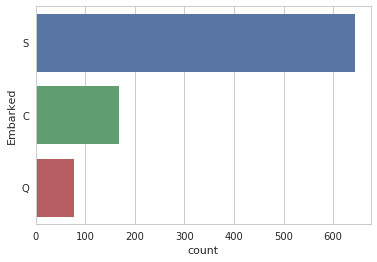

In [10]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.countplot(y="Embarked" , data = train_df)

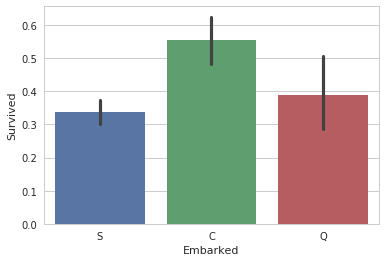

In [11]:
sns.barplot(x="Embarked", y = "Survived", data = train_df)

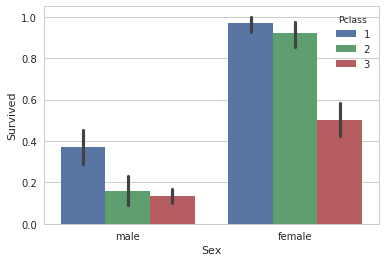

In [12]:
sns.barplot(x="Sex", y= "Survived", hue="Pclass", data = train_df)

All the missing data has been filled. Whats left now is to encode categorical values and feature scaling.
Lets start with encoding.

In [13]:
train_df = pd.get_dummies(train_df, columns = ["Sex", "Pclass","Embarked"])
test_df = pd.get_dummies(test_df, columns = ["Sex", "Pclass","Embarked"])
train_df.head(n=5)

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [14]:
train_df.count()

Survived      889
Age           889
SibSp         889
Parch         889
Fare          889
Sex_female    889
Sex_male      889
Pclass_1      889
Pclass_2      889
Pclass_3      889
Embarked_C    889
Embarked_Q    889
Embarked_S    889
dtype: int64

The dataset is now complete. On to feature scaling and data splitting.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train, validate = train_test_split(train_df, test_size = 0.25, random_state = seed)
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
x_val = validate.iloc[:,1:]
y_val = validate.iloc[:,0]
x_full = train_df.iloc[:,1:]
y_full = train_df.iloc[:,0]

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(test_df)
x_full = scaler.transform(x_full)

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [14]:
parameters_test1 = [{'C': [1, 10, 100, 1000, 2000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grsearch1 = GridSearchCV(SVC(),
                        param_grid = parameters_test1, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch1 = grsearch1.fit(x_train, y_train)
pd.DataFrame(grsearch1.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.014849,0.003239,0.821465,0.829222,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",5,0.872473,0.840504,0.798999,0.820748,0.792562,0.826414,0.007483,0.001720,0.036286,0.008306
1,0.048877,0.002034,0.823756,0.832460,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",4,0.872388,0.840265,0.798050,0.817441,0.800506,0.839673,0.019916,0.000717,0.034519,0.010623
2,0.251245,0.001322,0.824964,0.833030,100,NaN,linear,"{'C': 100, 'kernel': 'linear'}",3,0.872388,0.840243,0.801760,0.815949,0.800419,0.842896,0.196532,0.000010,0.033652,0.012126
3,22.346374,0.001420,0.831333,0.842939,1000,NaN,linear,"{'C': 1000, 'kernel': 'linear'}",2,0.872131,0.840417,0.815390,0.831600,0.806181,0.856799,14.554794,0.000123,0.029189,0.010441
4,27.383588,0.001354,0.832353,0.843834,2000,NaN,linear,"{'C': 2000, 'kernel': 'linear'}",1,0.871788,0.840764,0.813578,0.830909,0.811420,0.859829,10.857423,0.000062,0.027993,0.012005
5,0.008832,0.002731,0.818944,0.880464,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",6,0.820144,0.894374,0.812888,0.871009,0.823817,0.876010,0.001712,0.000233,0.004537,0.010045
6,0.007025,0.002882,0.803666,0.887093,1,0.2,rbf,"{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}",8,0.800188,0.896349,0.809783,0.876737,0.801030,0.888194,0.000115,0.000312,0.004339,0.008044
7,0.007188,0.003369,0.804267,0.894638,1,0.3,rbf,"{'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}",7,0.805584,0.902662,0.817029,0.882315,0.790117,0.898938,0.000089,0.000721,0.011014,0.008846
8,0.007529,0.002943,0.800699,0.898684,1,0.4,rbf,"{'C': 1, 'gamma': 0.4, 'kernel': 'rbf'}",9,0.799161,0.904853,0.815735,0.885060,0.787149,0.906137,0.000171,0.000087,0.011708,0.009647
9,0.007904,0.002949,0.797164,0.902940,1,0.5,rbf,"{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}",14,0.792480,0.905678,0.813578,0.891610,0.785402,0.911531,0.000322,0.000076,0.011961,0.008360


In [15]:
grsearch1.best_score_, grsearch1.best_params_

(0.83235271199891636, {'C': 2000, 'kernel': 'linear'})

In [16]:
measures = 10
result= []
Sum = 0
for i in range(measures):
    import time
    start = time.time()
    clf = SVC(kernel = 'rbf', gamma = 0.2, C = 1)
    clf.fit(x_train, y_train)
    finish = time.time()
    result = finish-start
    Sum = Sum+result
  
mean = Sum/measures
print('Total time elapsed: {time}' .format(time = Sum))
print('Average time elapsed per measure: {time}'.format(time = mean))

Total time elapsed: 0.17357921600341797
Average time elapsed per measure: 0.017357921600341795


In [17]:
clf = SVC(kernel = 'rbf', gamma = 0.2, C = 1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_val)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, y_pred)
cm

array([[120,  14],
       [ 27,  62]])

In [19]:
1-(cm[0,1] + cm[1,0])/(cm[0,0]+cm[1,1])

0.77472527472527475

It seems we have about 76% accuracy on our test set with the current model.
Time to make the real predictions and see what that gives us.

In [20]:
predictions = clf.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [21]:

inputdf = pd.read_csv("test.csv")
data_to_submit = pd.DataFrame({
    'PassengerId':inputdf.iloc[:,0],
    'Survived':predictions
})
data_to_submit.to_csv("svm_results.csv", index=False)

results on kaggle are now at 77,9% accuracy

The grid search made above is quite heavy. What results would svm achieve when using default parameters?

In [22]:
clf = SVC(kernel = 'rbf')
clf.fit(x_train, y_train)
val_predictions = clf.predict(x_val)
cm = confusion_matrix(val_predictions, y_val)
cm

array([[125,  27],
       [  9,  62]])

In [23]:
1-(cm[0,1] + cm[1,0])/(cm[0,0]+cm[1,1])

0.80748663101604279

With the default parameters it seems we achieve 74% accuracy on our test set.

Lets look a bit closer at our optimizations and see if there is more that can be done.

In [24]:
parameters_test2 = {'C': [0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 2], 'kernel': ['rbf'], 'gamma': [0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.9]}
grsearch2 = GridSearchCV(SVC(random_state = 7),
                        param_grid = parameters_test2, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch2 = grsearch2.fit(x_train, y_train)
pd.DataFrame(grsearch2.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.012646,0.008658,0.819046,0.870528,0.5,0.1,rbf,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}",3,0.821857,0.876822,0.816339,0.862275,0.818928,0.872486,0.005170,0.007427,0.002257,0.006098
1,0.009215,0.005917,0.814503,0.871522,0.5,0.15,rbf,"{'C': 0.5, 'gamma': 0.15, 'kernel': 'rbf'}",9,0.818003,0.878667,0.807626,0.862016,0.817880,0.873883,0.001955,0.003915,0.004863,0.007000
2,0.008043,0.007820,0.813495,0.874335,0.5,0.2,rbf,"{'C': 0.5, 'gamma': 0.2, 'kernel': 'rbf'}",11,0.811751,0.880250,0.813751,0.861994,0.814999,0.880759,0.000786,0.005800,0.001338,0.008728
3,0.017407,0.003022,0.813404,0.876113,0.5,0.25,rbf,"{'C': 0.5, 'gamma': 0.25, 'kernel': 'rbf'}",12,0.813720,0.879968,0.812716,0.863551,0.813777,0.884820,0.013133,0.000162,0.000487,0.009101
4,0.007131,0.003234,0.813801,0.878216,0.5,0.3,rbf,"{'C': 0.5, 'gamma': 0.3, 'kernel': 'rbf'}",10,0.816547,0.884264,0.812457,0.865734,0.812380,0.884648,0.000206,0.000450,0.001949,0.008827
5,0.007292,0.003285,0.800130,0.882699,0.5,0.5,rbf,"{'C': 0.5, 'gamma': 0.5, 'kernel': 'rbf'}",42,0.790339,0.881856,0.812284,0.876478,0.797800,0.889763,0.000160,0.000147,0.009118,0.005456
6,0.007867,0.003333,0.800223,0.895030,0.5,0.9,rbf,"{'C': 0.5, 'gamma': 0.9, 'kernel': 'rbf'}",41,0.784087,0.886564,0.806677,0.885493,0.810023,0.913035,0.000334,0.000224,0.011530,0.012739
7,0.008435,0.004726,0.819456,0.875898,0.8,0.1,rbf,"{'C': 0.8, 'gamma': 0.1, 'kernel': 'rbf'}",2,0.819630,0.887236,0.817460,0.866037,0.821285,0.874420,0.000715,0.002650,0.001565,0.008718
8,0.007085,0.002964,0.817039,0.878410,0.8,0.15,rbf,"{'C': 0.8, 'gamma': 0.15, 'kernel': 'rbf'}",6,0.817746,0.889927,0.813578,0.867896,0.819801,0.877407,0.000087,0.000267,0.002587,0.009022
9,0.007885,0.002734,0.801558,0.883118,0.8,0.2,rbf,"{'C': 0.8, 'gamma': 0.2, 'kernel': 'rbf'}",34,0.798133,0.890013,0.809869,0.872371,0.796665,0.886969,0.000640,0.000069,0.005907,0.007700


In [25]:
grsearch2.best_score_, grsearch2.best_params_

(0.82052489025375874, {'C': 0.9, 'gamma': 0.1, 'kernel': 'rbf'})

In [26]:
parameters_test2 = {'C': [0.2, 0.3, 0.5, 0.8, 0.9, 1, 1.1, 1.2, 1.5, 2], 'kernel': ['rbf'], 'gamma': [0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5, 0.9]}
grsearch2 = GridSearchCV(SVC(random_state = 7),
                        param_grid = parameters_test2, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch2 = grsearch2.fit(x_train, y_train)
pd.DataFrame(grsearch2.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.021412,0.012257,0.852401,0.858007,0.2,0.01,rbf,"{'C': 0.2, 'gamma': 0.01, 'kernel': 'rbf'}",1,0.867249,0.851330,0.854296,0.856050,0.835516,0.866641,0.013404,0.010539,0.013024,0.006402
1,0.012146,0.011141,0.833752,0.858420,0.2,0.05,rbf,"{'C': 0.2, 'gamma': 0.05, 'kernel': 'rbf'}",13,0.850462,0.855778,0.827899,0.851142,0.822769,0.868338,0.005547,0.011195,0.012039,0.007265
2,0.008687,0.003221,0.831312,0.858720,0.2,0.08,rbf,"{'C': 0.2, 'gamma': 0.08, 'kernel': 'rbf'}",15,0.845581,0.856732,0.825483,0.853023,0.822769,0.866405,0.002009,0.000133,0.010184,0.005641
3,0.007701,0.003391,0.828102,0.859332,0.2,0.1,rbf,"{'C': 0.2, 'gamma': 0.1, 'kernel': 'rbf'}",20,0.836588,0.857687,0.823758,0.856698,0.823904,0.863611,0.001065,0.000301,0.006021,0.003053
4,0.007425,0.005776,0.821675,0.857662,0.2,0.15,rbf,"{'C': 0.2, 'gamma': 0.15, 'kernel': 'rbf'}",25,0.820486,0.857275,0.820911,0.853477,0.823642,0.862236,0.000287,0.001351,0.001397,0.003586
5,0.007974,0.004001,0.817582,0.860924,0.2,0.2,rbf,"{'C': 0.2, 'gamma': 0.2, 'kernel': 'rbf'}",37,0.816375,0.863176,0.818323,0.855942,0.818055,0.863654,0.000285,0.001146,0.000863,0.003528
6,0.009025,0.003360,0.816323,0.861604,0.2,0.25,rbf,"{'C': 0.2, 'gamma': 0.25, 'kernel': 'rbf'}",41,0.811579,0.861484,0.818496,0.858471,0.818928,0.864857,0.000517,0.000119,0.003370,0.002609
7,0.009421,0.003721,0.815355,0.863095,0.2,0.3,rbf,"{'C': 0.2, 'gamma': 0.3, 'kernel': 'rbf'}",44,0.807211,0.859206,0.817633,0.858968,0.821285,0.871111,0.002507,0.000112,0.005967,0.005669
8,0.011847,0.005204,0.812563,0.870681,0.2,0.5,rbf,"{'C': 0.2, 'gamma': 0.5, 'kernel': 'rbf'}",54,0.803786,0.860312,0.815131,0.868436,0.818841,0.883295,0.004384,0.002225,0.006409,0.009516
9,0.009253,0.003989,0.809453,0.882411,0.2,0.9,rbf,"{'C': 0.2, 'gamma': 0.9, 'kernel': 'rbf'}",59,0.798476,0.871420,0.815131,0.874684,0.814825,0.901130,0.000853,0.000334,0.007789,0.013303


In [27]:
grsearch2.best_score_, grsearch2.best_params_

(0.85240134763549036, {'C': 0.2, 'gamma': 0.01, 'kernel': 'rbf'})

In [28]:
parameters_test2 = {'C': [0.3, 0.5, 0.8, 1], 'kernel': ['rbf'], 'gamma': [0.001, 0.005, 0.008, 0.01, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]}
grsearch2 = GridSearchCV(SVC(random_state = 7),
                        param_grid = parameters_test2, scoring = 'roc_auc', cv = 3, n_jobs = 4, return_train_score = True )
grsearch2 = grsearch2.fit(x_train, y_train)
pd.DataFrame(grsearch2.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.018374,0.012735,0.847861,0.851709,0.3,0.001,rbf,"{'C': 0.3, 'gamma': 0.001, 'kernel': 'rbf'}",10,0.857742,0.843628,0.852398,0.849327,0.833333,0.862171,0.005857,0.008482,0.010469,0.007755
1,0.010923,0.005084,0.851799,0.857202,0.3,0.005,rbf,"{'C': 0.3, 'gamma': 0.005, 'kernel': 'rbf'}",3,0.866821,0.851504,0.852657,0.854580,0.835778,0.865523,0.004026,0.001960,0.012688,0.006017
2,0.008786,0.004492,0.852784,0.857459,0.3,0.008,rbf,"{'C': 0.3, 'gamma': 0.008, 'kernel': 'rbf'}",2,0.867849,0.851156,0.850932,0.854709,0.839445,0.866512,0.001203,0.000714,0.011669,0.006564
3,0.006944,0.003253,0.850392,0.857510,0.3,0.01,rbf,"{'C': 0.3, 'gamma': 0.01, 'kernel': 'rbf'}",4,0.866564,0.852762,0.847826,0.852418,0.836651,0.867350,0.000080,0.000021,0.012346,0.006959
4,0.006622,0.003140,0.834194,0.860350,0.3,0.05,rbf,"{'C': 0.3, 'gamma': 0.05, 'kernel': 'rbf'}",17,0.846608,0.860008,0.830141,0.853347,0.825738,0.867694,0.000422,0.000309,0.008989,0.005862
5,0.007072,0.003239,0.831883,0.863029,0.3,0.08,rbf,"{'C': 0.3, 'gamma': 0.08, 'kernel': 'rbf'}",19,0.836759,0.862503,0.829279,0.856677,0.829579,0.869907,0.000865,0.000470,0.003462,0.005414
6,0.007002,0.003433,0.828721,0.863944,0.3,0.1,rbf,"{'C': 0.3, 'gamma': 0.1, 'kernel': 'rbf'}",21,0.833505,0.865714,0.823844,0.857584,0.828793,0.868532,0.000223,0.000701,0.003949,0.004641
7,0.006963,0.003068,0.817799,0.863999,0.3,0.15,rbf,"{'C': 0.3, 'gamma': 0.15, 'kernel': 'rbf'}",29,0.815947,0.867298,0.813233,0.857887,0.824254,0.866813,0.000126,0.000070,0.004682,0.004327
8,0.008661,0.004021,0.815263,0.868430,0.3,0.2,rbf,"{'C': 0.3, 'gamma': 0.2, 'kernel': 'rbf'}",31,0.809010,0.872223,0.817374,0.863097,0.819452,0.869972,0.001591,0.000518,0.004517,0.003882
9,0.007835,0.003421,0.812672,0.868097,0.3,0.25,rbf,"{'C': 0.3, 'gamma': 0.25, 'kernel': 'rbf'}",37,0.803614,0.868404,0.818323,0.863681,0.816134,0.872206,0.000223,0.000593,0.006488,0.003487


In [29]:
grsearch2.best_score_, grsearch2.best_params_

(0.85356139494102035, {'C': 0.5, 'gamma': 0.005, 'kernel': 'rbf'})

In [30]:
clf = SVC(kernel = 'rbf', C = 1, gamma = 0.008)
clf.fit(x_train, y_train)
val_predictions = clf.predict(x_val)
cm = confusion_matrix(val_predictions, y_val)
cm

array([[111,  28],
       [ 23,  61]])

In [31]:
1-(cm[0,1] + cm[1,0])/(cm[0,0]+cm[1,1])

0.70348837209302317

Examining the test results it seems we have slighthly balanced the number of false positives and negatives (decreased variance) but increased the bias.
We did get a slight increase in AUC. Lets see what result we get on kaggle.

In [30]:
predictions = clf.predict(x_test)
inputdf = pd.read_csv("test.csv")
data_to_submit = pd.DataFrame({
    'PassengerId':inputdf.iloc[:,0],
    'Survived':predictions
})
data_to_submit.to_csv("svm_results.csv", index=False)

SyntaxError: invalid syntax (<ipython-input-30-6a6d2e768112>, line 1)

Ahd the result is still 77,03% 

In [31]:
clf = SVC(kernel = 'rbf', C = 1, gamma = 0.008)
clf.fit(x_full, y_full)
predictions = clf.predict(x_test)

In [32]:
predictions = clf.predict(x_test)
inputdf = pd.read_csv("test.csv")
data_to_submit = pd.DataFrame({
    'PassengerId':inputdf.iloc[:,0],
    'Survived':predictions
})
data_to_submit.to_csv("full_svm_results.csv", index=False)